<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [292]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!pip install pandas numpy seaborn matplotlib scikit-learn
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [224]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [225]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [226]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [227]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [228]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [229]:
df = pd.read_csv("Weather_Data.csv")

In [230]:
# filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
# df = pd.read_csv(filepath)

In [231]:
df.head(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,...,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,...,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,...,77,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,...,92,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,...,80,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [232]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [233]:
df_sydney_processed.head(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,41,9,22,69,...,0,0,0,0,0,0,0,0,0,0
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,41,15,15,75,...,0,0,1,0,0,0,0,0,0,0
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,41,7,15,77,...,0,0,0,1,0,0,0,0,0,0
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,41,19,9,92,...,0,0,0,0,0,0,0,1,0,0
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,41,11,20,80,...,0,0,0,0,1,0,0,0,0,0


In [234]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [235]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [236]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [237]:
df_sydney_processed = df_sydney_processed.astype(float)

In [238]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


In [239]:
#Enter Your Code and Execute
x_train, x_test, y_train, y_test= train_test_split(features, Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [242]:
from sklearn import linear_model
LinearReg = linear_model.LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [243]:
print ('Coefficients: ', LinearReg.coef_)
print ('Intercept: ',LinearReg.intercept_)

Coefficients:  [-2.36883601e-02  1.30031554e-02  7.30154915e-04  6.49290860e-03
 -3.51614515e-02  4.23841910e-03  1.82843563e-03  7.89794445e-04
  9.55888360e-04  8.56007751e-03  7.70261345e-03 -9.24932344e-03
 -8.87528023e-03  1.00457553e-02  1.44651992e-02 -3.48325241e-03
  1.03190076e+10  1.03190076e+10 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.183155

In [245]:
predictions = LinearReg.predict(x_test)

In [247]:
from sklearn.metrics import r2_score

LinearRegression_MAE =  np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions - y_test) ** 2)
LinearRegression_R2 = r2_score(y_test , predictions)

In [249]:
# Report = 
Report = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})

print(Report)

  Metric     Value
0    MAE  0.256319
1    MSE  0.115721
2     R2  0.427130


### KNN


In [251]:
KNN =  KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

In [253]:
predictions = KNN.predict(x_test)
predictions[0:5]

array([0., 0., 1., 0., 0.])

In [278]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print("KNN Accuracy Score:", KNN_Accuracy_Score)
print("KNN JaccardIndex Score:",KNN_JaccardIndex)
print("KNN F1 Score:",KNN_F1_Score)

KNN Accuracy Score: 0.8183206106870229
KNN JaccardIndex Score: 0.6970108055589621
KNN F1 Score: 0.8132626923421479


### Decision Tree


In [256]:
#Enter Your Code and Execute

In [257]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [259]:
predictions = Tree.predict(x_test)
print (predictions [0:10])
print (y_test [0:10])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predictions))

[0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
3066    0.0
2456    0.0
1629    1.0
838     1.0
2506    0.0
130     1.0
2404    1.0
1226    1.0
290     1.0
2136    0.0
Name: RainTomorrow, dtype: float64
DecisionTrees's Accuracy:  0.8183206106870229


In [260]:
from sklearn.model_selection import cross_val_score

max_depths = range(1, 20)  # Try depths from 1 to 19
scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    score = cross_val_score(tree, x_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

best_depth = max_depths[scores.index(max(scores))]
print("Best depth:", best_depth)

Best depth: 2


In [262]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')
Tree_F1_Score = f1_score(y_test, predictions, average='weighted')

print("Tree Accuracy Score:", Tree_Accuracy_Score)
print("Tree Jaccard Index:", Tree_JaccardIndex)
print("Tree F1 Score:", Tree_F1_Score)

Tree Accuracy Score: 0.8183206106870229
Tree Jaccard Index: 0.6970108055589621
Tree F1 Score: 0.8132626923421479


### Logistic Regression


In [281]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [282]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

In [284]:
predictions = LR.predict(x_test)
predictions

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0.

In [286]:
predict_proba = LR.predict_proba(x_test)
predict_proba

array([[0.71865881, 0.28134119],
       [0.97588309, 0.02411691],
       [0.49701316, 0.50298684],
       ...,
       [0.97264179, 0.02735821],
       [0.73341148, 0.26658852],
       [0.38535861, 0.61464139]])

In [288]:
#Enter Your Code and Execute
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predictions, labels=[1,0]))


[[106  76]
 [ 37 436]]


Confusion matrix, without normalization
[[106  76]
 [ 37 436]]


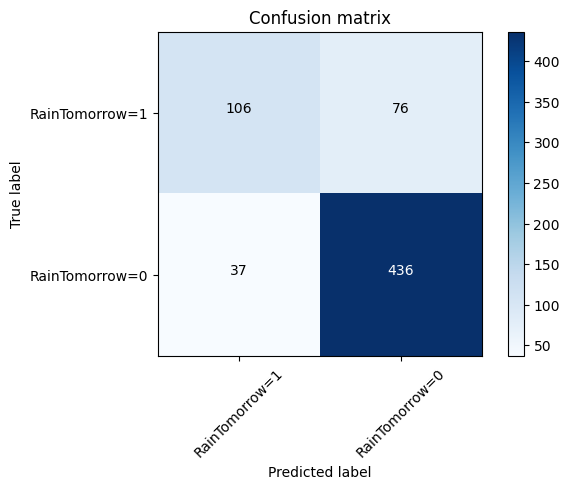

In [289]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RainTomorrow=1','RainTomorrow=0'],normalize= False,  title='Confusion matrix')

In [296]:
print (classification_report(y_test, predictions ))


              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89       473
         1.0       0.74      0.58      0.65       182

    accuracy                           0.83       655
   macro avg       0.80      0.75      0.77       655
weighted avg       0.82      0.83      0.82       655



In [298]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex =  jaccard_score(y_test, predictions, average='weighted')
LR_F1_Score = f1_score(y_test, predictions, average='weighted')
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test)) 

print("LR Accuracy Score:", LR_Accuracy_Score)
print("LR Jaccard Index:", LR_JaccardIndex)
print("LR F1 Score:", LR_F1_Score)
print("LR Log Loss:", LR_Log_Loss)


LR Accuracy Score: 0.8274809160305343
LR Jaccard Index: 0.7079913151915388
LR F1 Score: 0.8205451234161274
LR Log Loss: 0.38008468070182194


### SVM


In [300]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train) 

SVC()

In [301]:
predictions = SVM.predict(x_test)

In [304]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions,average='weighted')
SVM_F1_Score = f1_score(y_test, predictions, average='weighted')
print("SVM_Accuracy_Score:", SVM_Accuracy_Score)
print("SVM_JaccardIndex:", SVM_JaccardIndex)
print("SVM_F1_Score:", SVM_F1_Score)

SVM_Accuracy_Score: 0.7221374045801526
SVM_JaccardIndex: 0.5214824310937591
SVM_F1_Score: 0.6056223268908018


### Report


In [313]:
# Linear Regression metrics
LinearRegression_MAE = 0.256319
LinearRegression_MSE = 0.115721
LinearRegression_R2 = 0.427130

# Create a dictionary with the data
data = {
    'Model': ['SVM', 'Logistic Regression', 'Decision Tree', 'KNN', 'Linear Regression'],
    'Accuracy': [SVM_Accuracy_Score, LR_Accuracy_Score, Tree_Accuracy_Score, KNN_Accuracy_Score, None],
    'Jaccard Index': [SVM_JaccardIndex, LR_JaccardIndex, Tree_JaccardIndex, KNN_JaccardIndex, None],
    'F1-Score': [SVM_F1_Score, LR_F1_Score, Tree_F1_Score, KNN_F1_Score, None],
    'LogLoss': [None, LR_Log_Loss, None, None, None],
    'MAE': [None, None, None, None, LinearRegression_MAE],
    'MSE': [None, None, None, None, LinearRegression_MSE],
    'R2': [None, None, None, None, LinearRegression_R2]
}

# Create the DataFrame
Report = pd.DataFrame(data)

# Set 'Model' as the index
Report.set_index('Model', inplace=True)

# Display the report
print(Report)


                     Accuracy  Jaccard Index  F1-Score   LogLoss       MAE  \
Model                                                                        
SVM                  0.722137       0.521482  0.605622       NaN       NaN   
Logistic Regression  0.827481       0.707991  0.820545  0.380085       NaN   
Decision Tree        0.722137       0.521482  0.605622       NaN       NaN   
KNN                  0.818321       0.697011  0.813263       NaN       NaN   
Linear Regression         NaN            NaN       NaN       NaN  0.256319   

                          MSE       R2  
Model                                   
SVM                       NaN      NaN  
Logistic Regression       NaN      NaN  
Decision Tree             NaN      NaN  
KNN                       NaN      NaN  
Linear Regression    0.115721  0.42713  
